## Bài tập: Dự đoán bênh nhân có bị mắc tiểu đường hay không ?

Mục tiêu: Sử dụng bộ dữ liệu Diabetes để dự đoán bệnh nhân tiểu đường và đánh giá hiệu suất của mô hình.

Dữ liệu: Sử dụng bộ dữ liệu "diabetes.csv" chứa thông tin về các chỉ số của bệnh nhân 


### Câu 1: Thực hiện các bước cơ bản để chuẩn bị dữ liệu cho mô hình học máy:

- Tải bộ dữ liệu "diabetes.csv".
- Phân tích bộ dữ liệu : gồm nhữ feature nào , đâu là giá trị cần dự đoán , giá trị dự đoán có đặc điểm gì , bài toán thuộc bài toán phân loại hay hồi quy,..?
- Kiểm tra và xử lý dữ liệu bị thiếu (nếu có).
- Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra (tỷ lệ 80-20%, random_state=42).
- Chuẩn hóa data ( nếu có)
- Lựa chọn feature ( nếu có)

### Câu 2: Xây dựng mô hình sử dụng học máy:

- a. Sử dụng một thuật toán học máy (ví dụ: Logistic Regression, Decision Trees, Random Forest, hoặc SVM) để xây dựng mô hình.
- b. Huấn luyện mô hình trên tập huấn luyện.
- c. Sử dụng mô hình để dự đoán mức độ tiểu đường trên tập kiểm tra.


### Câu 3: Đánh giá hiệu suất của mô hình:

- a. Sử dụng các thước đo như độ chính xác (accuracy), precision, recall và F1-score để đánh giá hiệu suất của mô hình trên tập kiểm tra.
- b. Vẽ biểu đồ ROC và tính diện tích dưới đường cong ROC (AUC-ROC) để đánh giá khả năng phân loại của mô hình. Mục tiêu AUC-ROC Score > 0.8


### Câu 4: Tinh chỉnh mô hình (nếu cần):

- a. Nếu mô hình ban đầu không cho kết quả tốt, bạn có thể tinh chỉnh các siêu tham số của thuật toán học máy để cải thiện hiệu suất.

### Câu 5: Tạo một báo cáo tổng hợp về quá trình của bạn:

- a. Mô tả quá trình xử lý dữ liệu bị thiếu (nếu có).
- b. Trình bày các kết quả đánh giá hiệu suất của mô hình.
- c. Nêu ý kiến về khả năng ứng dụng thực tế của mô hình và các cải tiến tiềm năng.

### Câu 6: Triển khai mô hình trong thực tế 
- Sử dụng pickle lưu mô hình 
- Tạo 1 file code mới deploy.ipynb , load mô hình trong file này
- Nhập vào các dữ liệu để dự đoán bệnh nhân có bị mắc tiểu đường hay không.

### Câu 1: Thực hiện các bước cơ bản để chuẩn bị dữ liệu cho mô hình học máy:

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [231]:
df = pd.read_csv('diabetes.csv')

In [232]:
df.shape

(768, 9)

In [233]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [234]:
col_names = df.columns


col_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**bộ dữ liệu gòm 9 feature 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'**

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


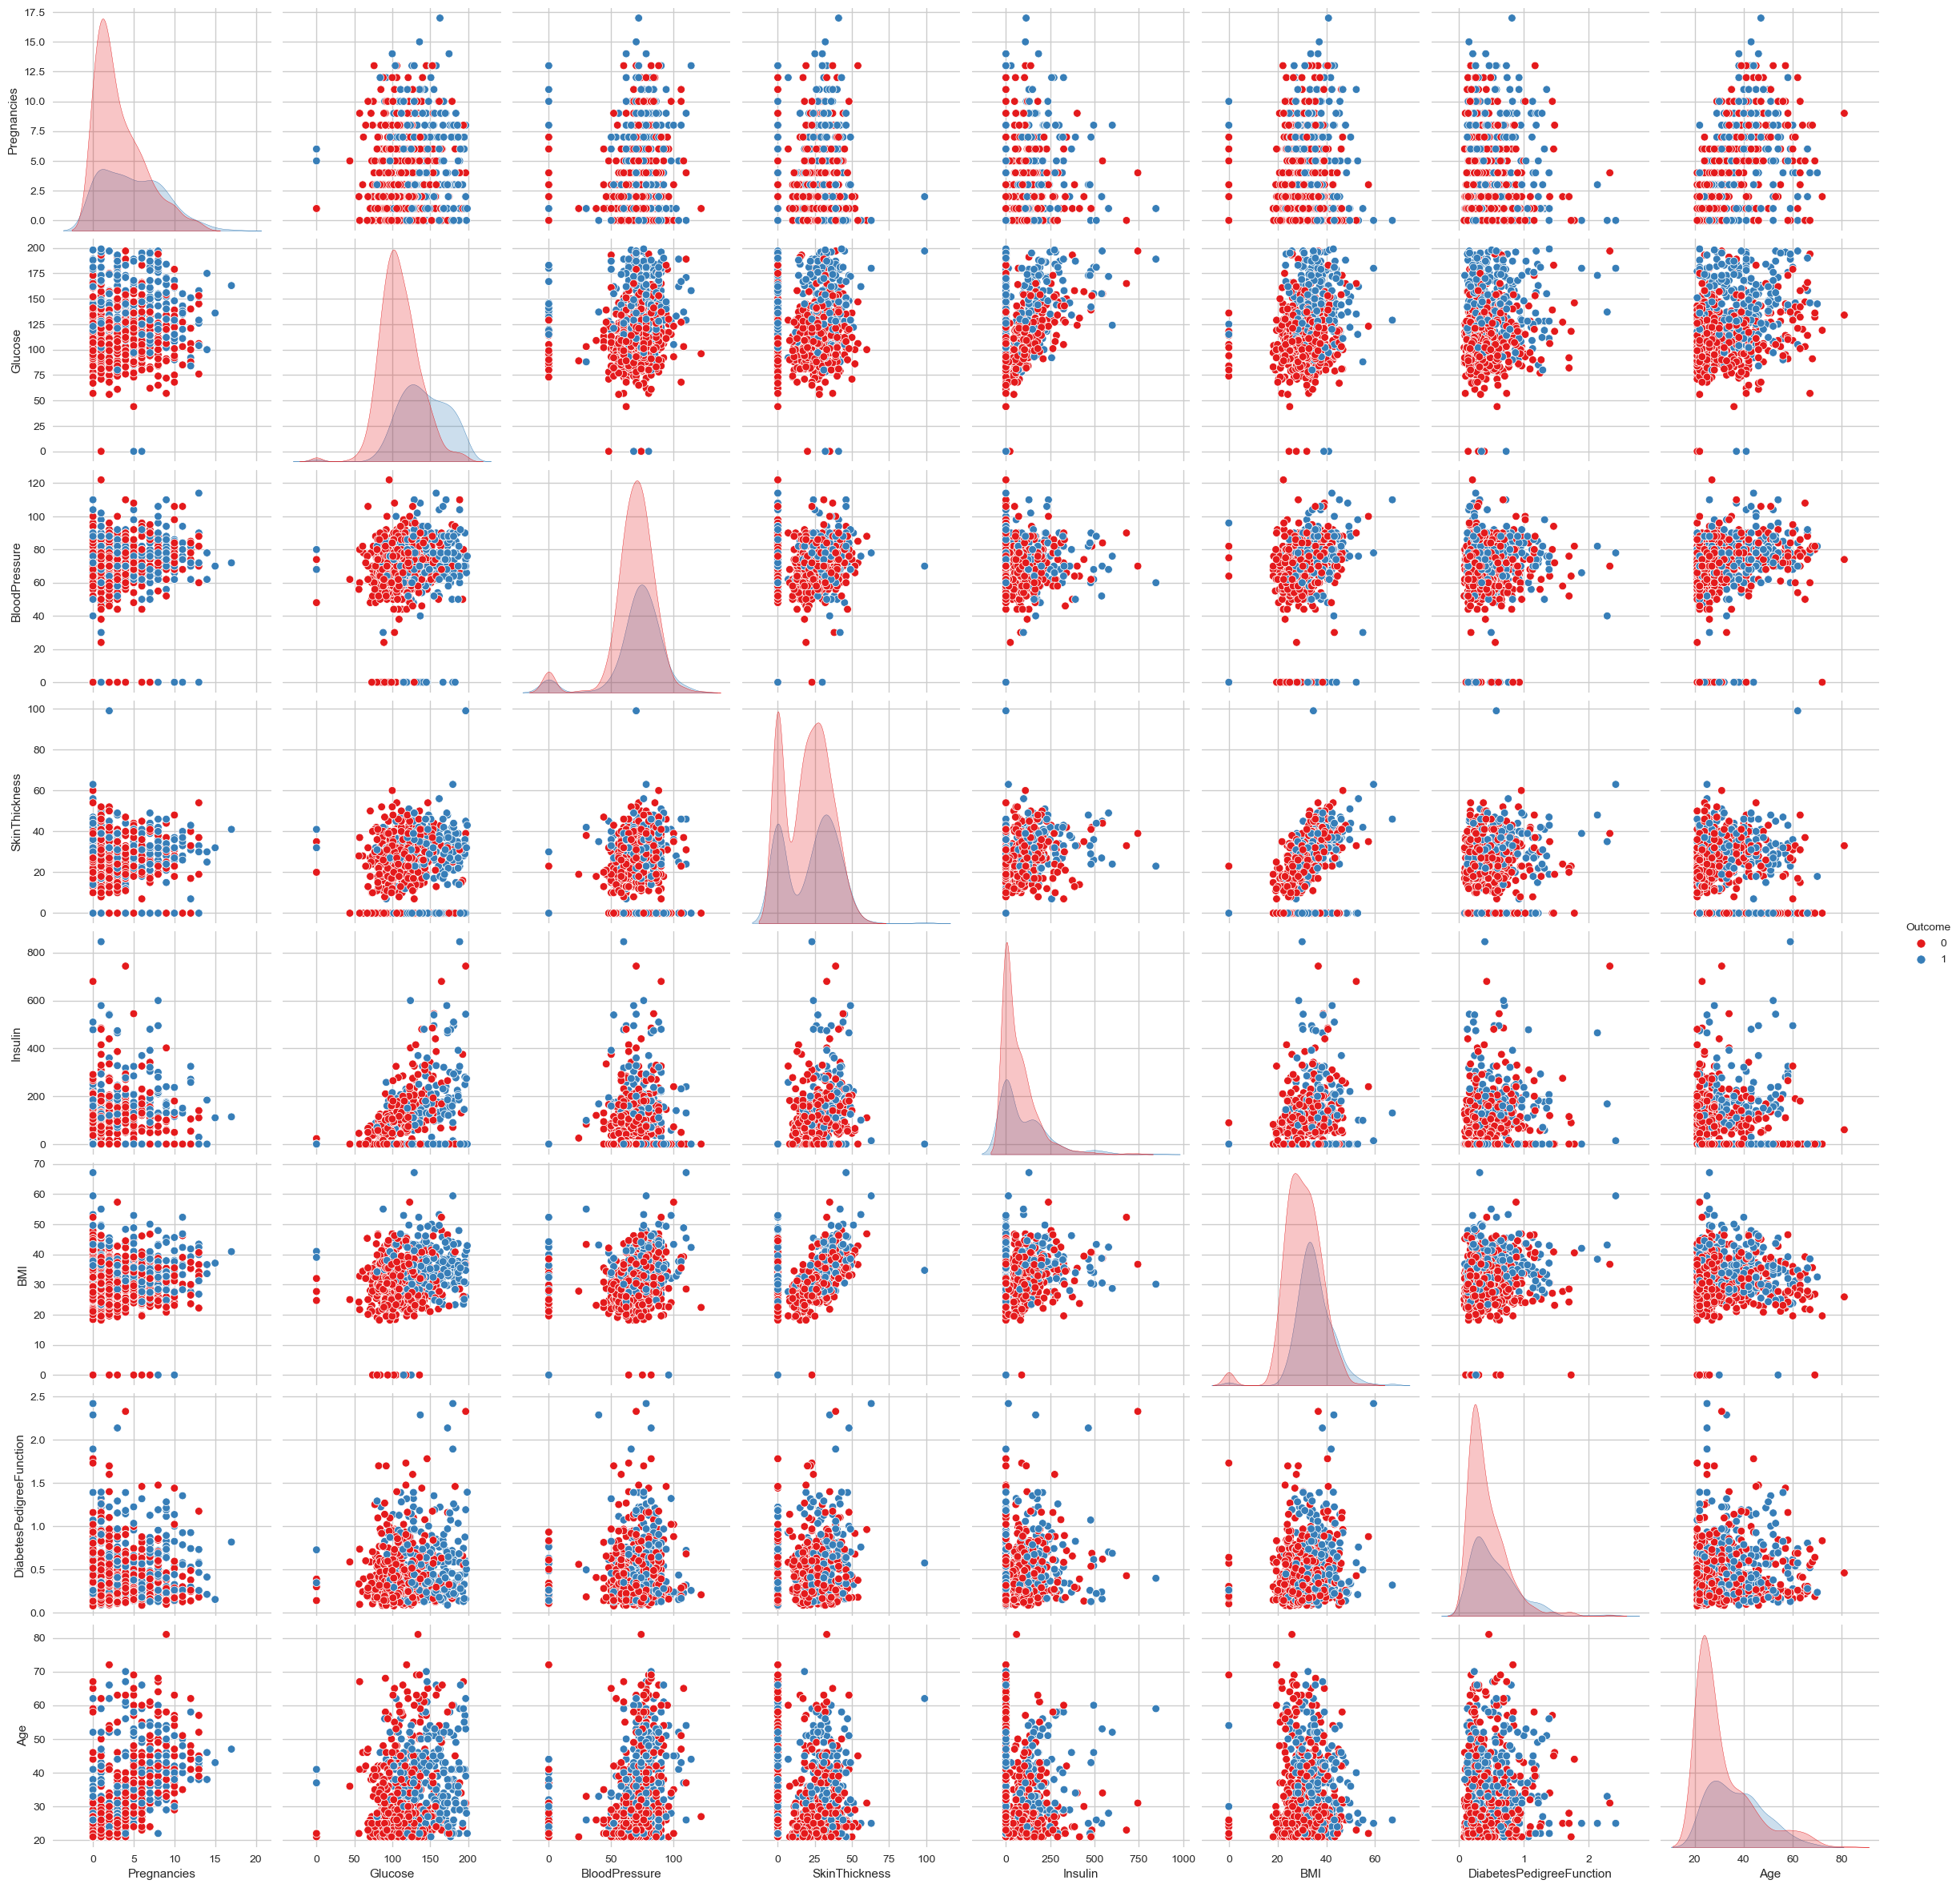

In [236]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(
    df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']],
    hue = "Outcome",
    height = 3,
    palette = "Set1")


**Nhận xét về dữ liệu:**
- Bài toán dự đoán bệnh nhân mắc bệnh tiểu đường sẽ trả về đáp án là có hoặc không, đây sẽ là bài toán phân loại
- Cột "Outcome" là cột cần dự đoán

In [237]:
df['Outcome'].isnull().sum()

0

In [238]:

df['Outcome'].nunique()

2

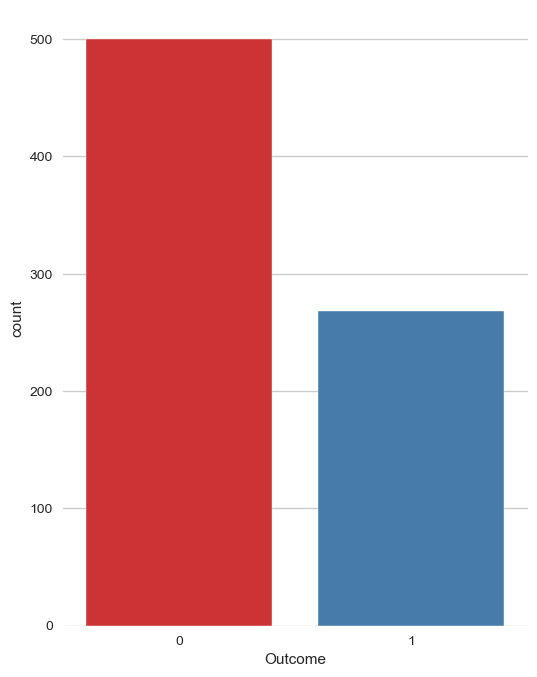

In [239]:
df['Outcome'].value_counts()/len(df)

f, ax = plt.subplots(figsize=(6, 8))

ax = sns.countplot(x='Outcome', data=df, palette="Set1")
plt.show()

<Axes: xlabel='Outcome', ylabel='Density'>

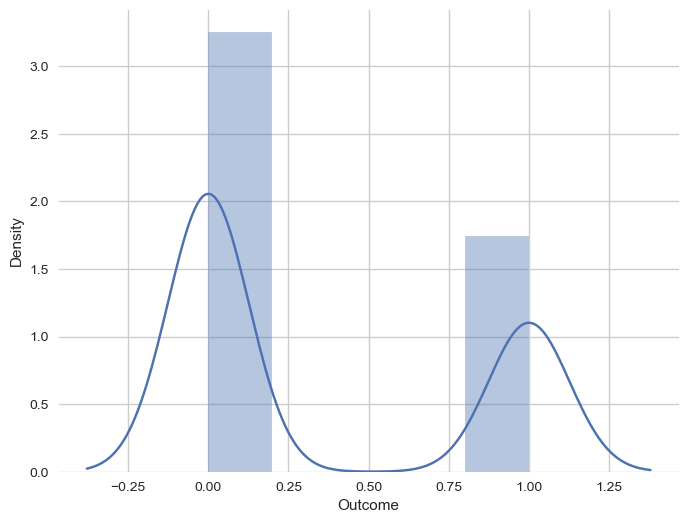

In [240]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Outcome'])

In [241]:
df['Outcome'].value_counts()/len(df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

**Giá trị outcome:**

- Số lượng nhãn trong biến RainTomorrow là 2.

- Hai giá trị nhãn là 1 và 0.

- Trong tổng số giá trị của Outcome, 0 xuất hiện 65.1% và 1 xuất hiện 34.9%.


#### Chuẩn hóa data

In [242]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [243]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [244]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [245]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [246]:
#### Normalize 
from sklearn.preprocessing import Normalizer

nor = Normalizer()
X_train_nor = nor.fit_transform(X_train)
X_test_nor = nor.transform(X_train)


In [247]:
X_train_nor

array([[0.02309233, 0.96987782, 0.        , ..., 0.        , 0.00351003,
        0.24246946],
       [0.05906005, 0.73496947, 0.53810265, ..., 0.18505481, 0.00841278,
        0.32811137],
       [0.00577388, 0.80256881, 0.26559831, ..., 0.16571025, 0.00377612,
        0.12702528],
       ...,
       [0.06653277, 0.67198102, 0.57218186, ..., 0.30338945, 0.00755812,
        0.25282454],
       [0.        , 0.93958663, 0.        , ..., 0.28254236, 0.00136607,
        0.19324831],
       [0.        , 0.77839224, 0.59780524, ..., 0.1401106 , 0.00163151,
        0.1307699 ]])

In [248]:
X_test_nor

array([[0.02309233, 0.96987782, 0.        , ..., 0.        , 0.00351003,
        0.24246946],
       [0.05906005, 0.73496947, 0.53810265, ..., 0.18505481, 0.00841278,
        0.32811137],
       [0.00577388, 0.80256881, 0.26559831, ..., 0.16571025, 0.00377612,
        0.12702528],
       ...,
       [0.06653277, 0.67198102, 0.57218186, ..., 0.30338945, 0.00755812,
        0.25282454],
       [0.        , 0.93958663, 0.        , ..., 0.28254236, 0.00136607,
        0.19324831],
       [0.        , 0.77839224, 0.59780524, ..., 0.1401106 , 0.00163151,
        0.1307699 ]])

### Câu 2: Xây dựng mô hình sử dụng học máy:

In [249]:
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import f1_score

#### lựa chọn đặc trưng bằng randomforest

In [250]:
rf_class = SelectFromModel(RandomForestClassifier(n_estimators=300, random_state=42))
rf_class.fit(X_train,y_train)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=300,
                                                 random_state=42))

In [251]:
selected_feat_random = X_train.columns[(rf_class.get_support())]
selected_feat_random

Index(['Glucose', 'BMI', 'Age'], dtype='object')

In [252]:
def print_result(model, X_train, X_test, y_train, y_test, selected_feat_random):

    model.fit(X_train[selected_feat_random], y_train)
    print('USE Random forest selected features')

    print('='*40)
    
    print(model)
    print()
    print('='*40)

    print('Train:')
    y_pred = model.predict(X_train[selected_feat_random])
    print('Accuracy:', accuracy_score(y_train, y_pred))
    print('Precision:', precision_score(y_train, y_pred))
    print('Recall:', recall_score(y_train, y_pred))
    print('F1 score:', f1_score(y_train, y_pred))
    print('Validation:')
    y_pred = model.predict(X_test[selected_feat_random])
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))

    print('='*40)
 # Vẽ biểu đồ ROC và tính AUC-ROC
    y_pred_proba = model.predict_proba(X_test[selected_feat_random])[:, 1]
    fpr, tpr,thresholds = roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print('AUC_ROC: ',auc)
    if auc > 0.8:
        print('Mô hình có khả năng phân loại tốt (AUC-ROC > 0.8)')
    else:
        print('Mô hình cần được cải thiện (AUC-ROC <= 0.8)')
    plt.figure(figsize=(15, 9))
    plt.plot(fpr,tpr,color='darkorange', lw=2,label="ROC_AUC="+str(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()



USE Random forest selected features
LogisticRegression()

Train:
Accuracy: 0.7719869706840391
Precision: 0.7134502923976608
Recall: 0.5727699530516432
F1 score: 0.6354166666666666
Validation:
Accuracy: 0.7467532467532467
Precision: 0.6481481481481481
Recall: 0.6363636363636364
F1 score: 0.6422018348623852
AUC_ROC:  0.78732782369146
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


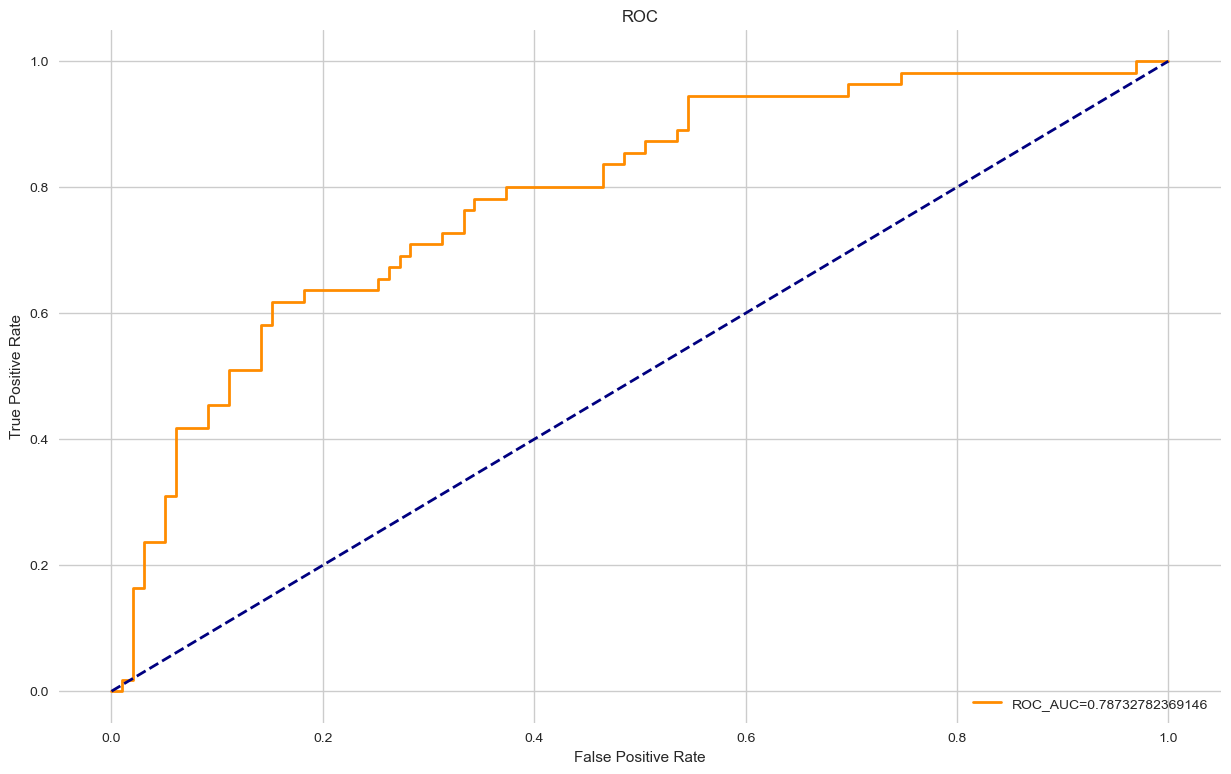

In [253]:
model = LogisticRegression()

print_result(model,X_train,X_test,y_train,y_test,selected_feat_random)

USE Random forest selected features
DecisionTreeClassifier()

Train:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Validation:
Accuracy: 0.6753246753246753
Precision: 0.5384615384615384
Recall: 0.6363636363636364
F1 score: 0.5833333333333334
AUC_ROC:  0.6666666666666666
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


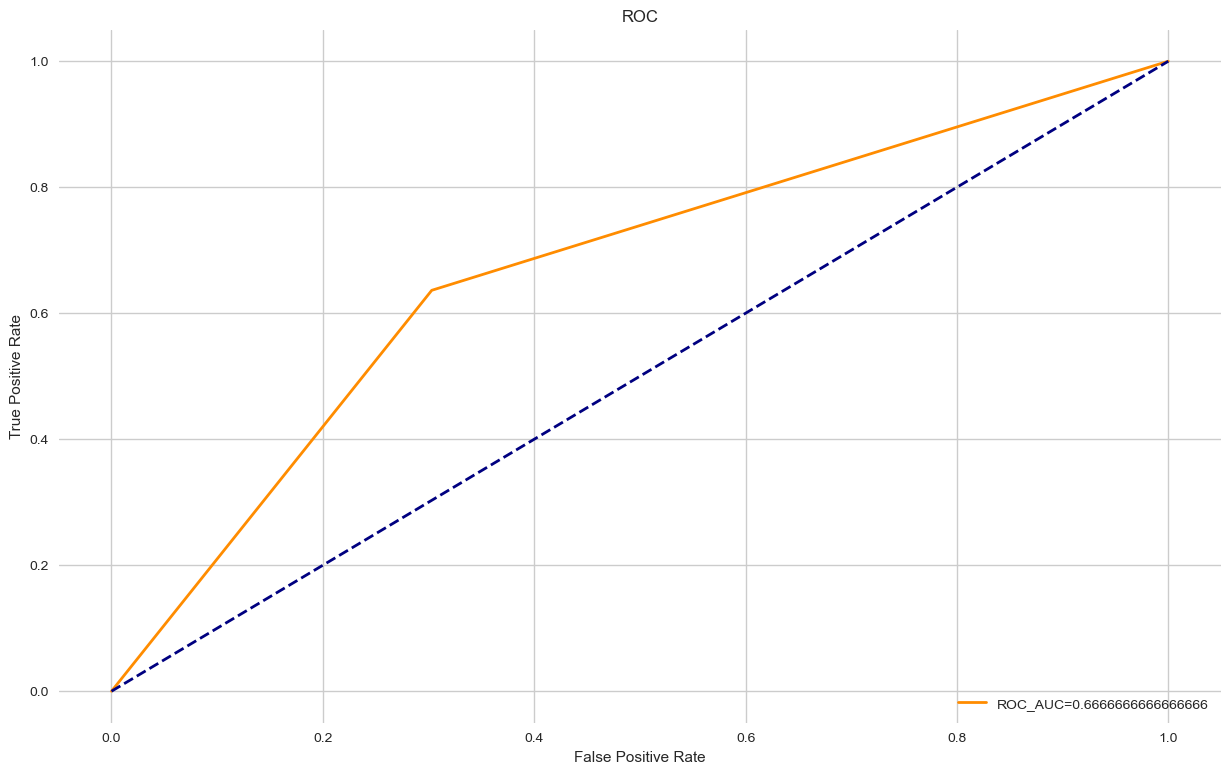

In [254]:
model = tree.DecisionTreeClassifier()
print_result(model,X_train,X_test,y_train,y_test,selected_feat_random)

USE Random forest selected features
AdaBoostClassifier()

Train:
Accuracy: 0.7964169381107492
Precision: 0.7417582417582418
Recall: 0.6338028169014085
F1 score: 0.6835443037974683
Validation:
Accuracy: 0.7207792207792207
Precision: 0.6153846153846154
Recall: 0.5818181818181818
F1 score: 0.5981308411214953
AUC_ROC:  0.8077134986225896
Mô hình có khả năng phân loại tốt (AUC-ROC > 0.8)


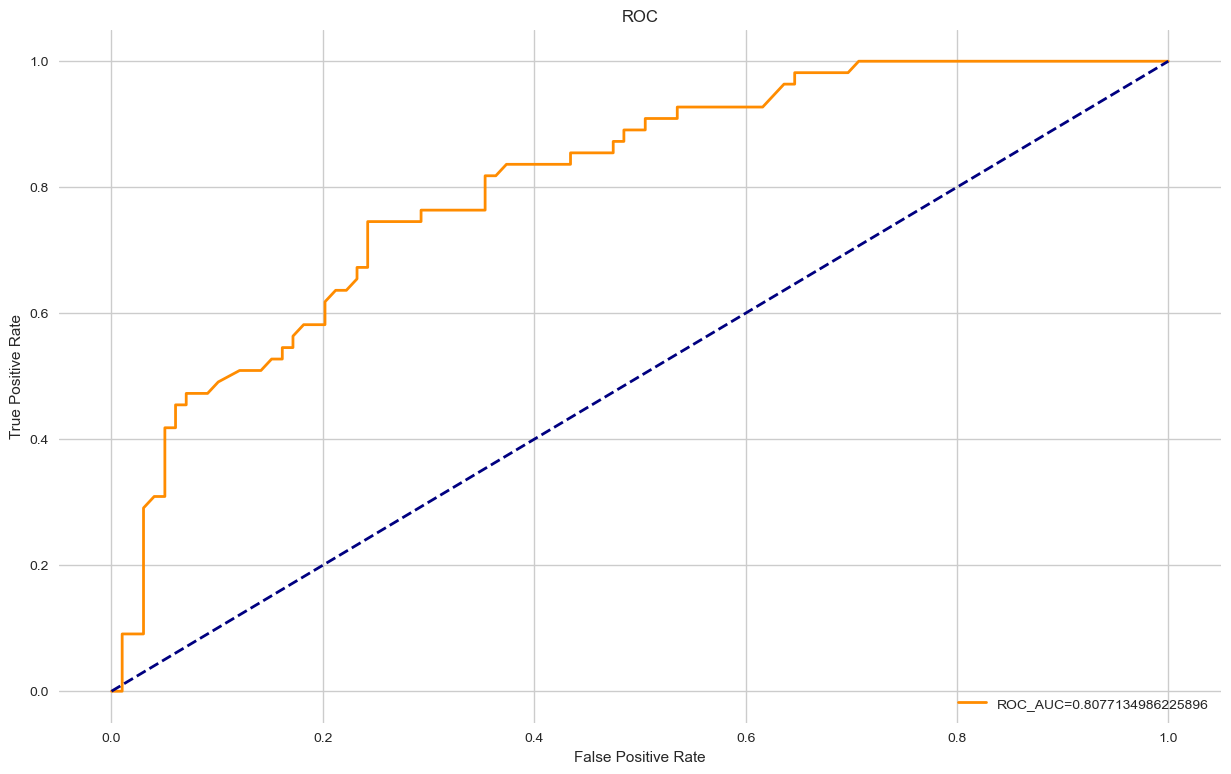

In [255]:
model = AdaBoostClassifier()
print_result(model,X_train,X_test,y_train,y_test,selected_feat_random)

USE Random forest selected features
MLPClassifier()

Train:
Accuracy: 0.6644951140065146
Precision: 0.8888888888888888
Recall: 0.03755868544600939
F1 score: 0.07207207207207207
Validation:
Accuracy: 0.6493506493506493
Precision: 1.0
Recall: 0.01818181818181818
F1 score: 0.03571428571428572
AUC_ROC:  0.6903581267217631
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


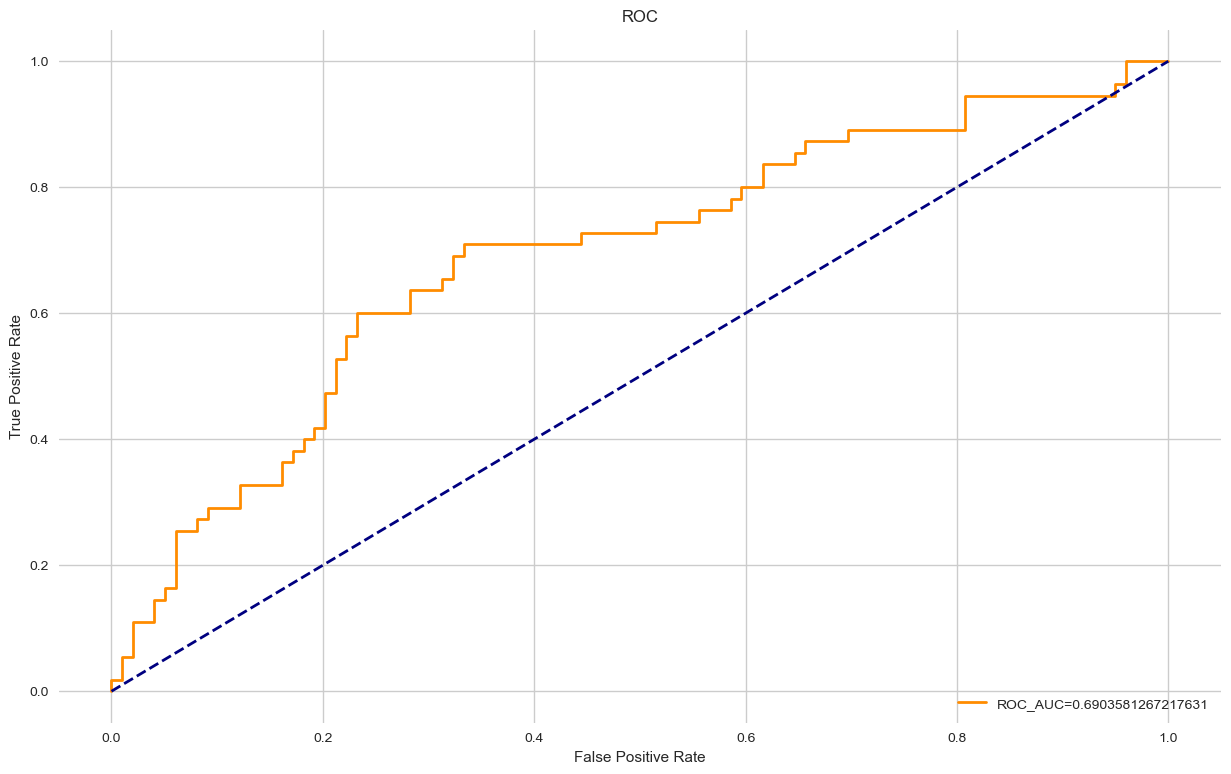

In [256]:
model = MLPClassifier()
print_result(model,X_train,X_test,y_train,y_test,selected_feat_random)

USE Random forest selected features
RandomForestClassifier()

Train:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Validation:
Accuracy: 0.7597402597402597
Precision: 0.6551724137931034
Recall: 0.6909090909090909
F1 score: 0.6725663716814159
AUC_ROC:  0.8103764921946739
Mô hình có khả năng phân loại tốt (AUC-ROC > 0.8)


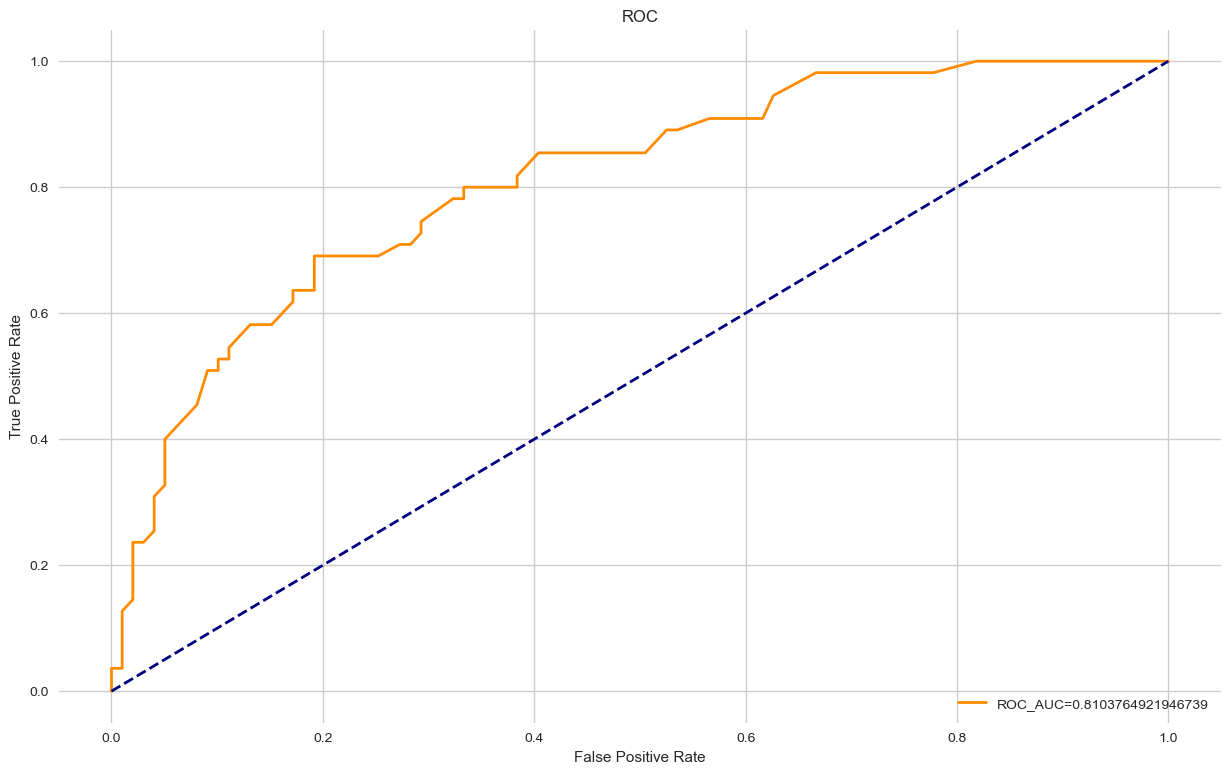

In [257]:
model = RandomForestClassifier()
print_result(model,X_train,X_test,y_train,y_test,selected_feat_random)

**Nhận xét kết quả:**
- Mô hình AdaBoostClassifier() có ROC-AUC > 0.8 là mô hình có khả năng phân loại tốt nhất 

#### Câu  5


- Dữ liệu kiểm tra qua thì đều ko bị thiếu và đều ở dạng số
- sử dụng feature selection bằng phương pháp randomforest
- thử qua các mô hình thì AdaBoostClassifier() là mô hình  tốt nhất với ROC_AUC trên 0.8

#### Câu 6:

In [265]:
import pickle

model = AdaBoostClassifier()
model.fit(X_train[selected_feat_random], y_train)

with open('ungthu.txt', 'wb') as model_file:
    pickle.dump(model, model_file)

In [262]:
X_train[selected_feat_random].head()

,Glucose,BMI,Age
60,84,0.0,21
618,112,28.2,50
346,139,28.7,22
294,161,21.9,65
231,134,46.2,46


In [263]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
